In [1]:
import pandas as pd
import numpy as np
import keras

np.random.seed(2)

/home/pekka/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/pekka/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Using TensorFlow backend.
/home/pekka/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/home/pekka/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/pekka/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate bi

In [2]:
data = pd.read_csv('Downloads/creditcard.csv')

## Data exploration

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Pre-procesing

In [5]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'], axis=1)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
data = data.drop(['Time'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [9]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [10]:
print(X)

               V1         V2        V3        V4        V5        V6  \
0       -1.359807  -0.072781  2.536347  1.378155 -0.338321  0.462388   
1        1.191857   0.266151  0.166480  0.448154  0.060018 -0.082361   
2       -1.358354  -1.340163  1.773209  0.379780 -0.503198  1.800499   
3       -0.966272  -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4       -1.158233   0.877737  1.548718  0.403034 -0.407193  0.095921   
5       -0.425966   0.960523  1.141109 -0.168252  0.420987 -0.029728   
6        1.229658   0.141004  0.045371  1.202613  0.191881  0.272708   
7       -0.644269   1.417964  1.074380 -0.492199  0.948934  0.428118   
8       -0.894286   0.286157 -0.113192 -0.271526  2.669599  3.721818   
9       -0.338262   1.119593  1.044367 -0.222187  0.499361 -0.246761   
10       1.449044  -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11       0.384978   0.616109 -0.874300 -0.094019  2.924584  3.317027   
12       1.249999  -1.221637  0.383930 -1.234899 -1.485419 -0.75

In [11]:
print(y)

        Class
0           0
1           0
2           0
3           0
4           0
5           0
6           0
7           0
8           0
9           0
10          0
11          0
12          0
13          0
14          0
15          0
16          0
17          0
18          0
19          0
20          0
21          0
22          0
23          0
24          0
25          0
26          0
27          0
28          0
29          0
...       ...
284777      0
284778      0
284779      0
284780      0
284781      0
284782      0
284783      0
284784      0
284785      0
284786      0
284787      0
284788      0
284789      0
284790      0
284791      0
284792      0
284793      0
284794      0
284795      0
284796      0
284797      0
284798      0
284799      0
284800      0
284801      0
284802      0
284803      0
284804      0
284805      0
284806      0

[284807 rows x 1 columns]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [16]:
X_train.shape

(199364, 29)

In [17]:
X_test.shape

(85443, 29)

In [18]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Neural Network

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [20]:
model = Sequential([
    Dense(units=16, input_dim = 29, activation='relu'),
    Dense(units = 24, activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1, activation='sigmoid'),
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
199364/199364 [==============================] - 106s 531us/step - loss: 0.0103 - acc: 0.9978
Epoch 2/5
199364/199364 [==============================] - 101s 505us/step - loss: 0.0040 - acc: 0.9993
Epoch 3/5
199364/199364 [==============================] - 104s 520us/step - loss: 0.0037 - acc: 0.9994
Epoch 4/5
199364/199364 [==============================] - 105s 529us/step - loss: 0.0035 - acc: 0.9994
Epoch 5/5
199364/199364 [==============================] - 113s 568us/step - loss: 0.0033 - acc: 0.9994


In [24]:
score = model.evaluate(X_test, y_test)

85443/85443 [==============================] - 11s 128us/step


In [25]:
print(score)

[0.003898227462385532, 0.9993914071369217]


In [ ]:

y_pred = model.predict(X_test)

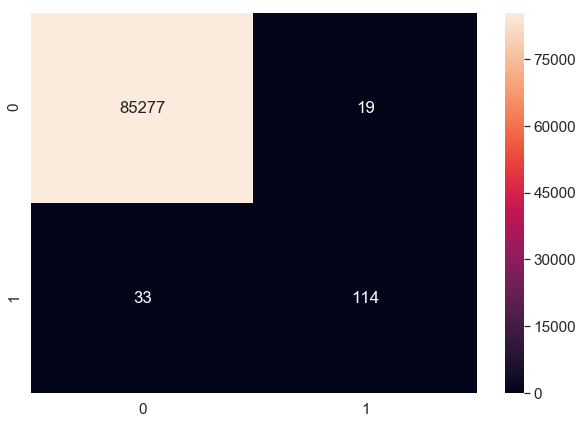

In [37]:
import seaborn as sns


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred.round())

df_cm = pd.DataFrame(cm, index=(0,1), columns = (0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()


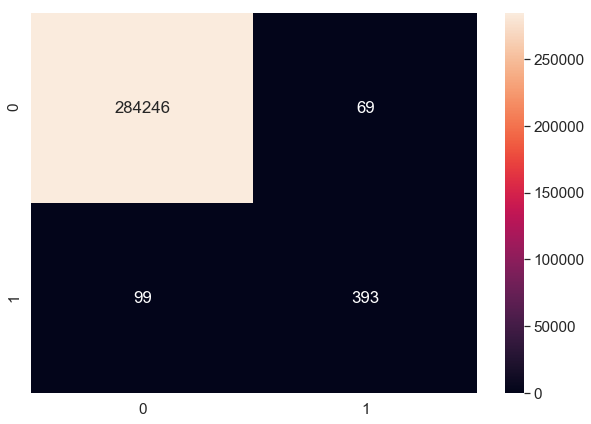

In [39]:
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())

df_cm = pd.DataFrame(cm, index=(0,1), columns = (0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

## Undersampling

In [40]:
fraud_indices = np.array(data[data.Class == 1].index)
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [41]:
normal_indices = data[data.Class == 0].index

In [42]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [43]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [44]:
under_sample_data = data.iloc[under_sample_indices,:]

In [45]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3)

In [48]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [49]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                480       
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_4 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
688/688 [==============================] - 4s 6ms/step - loss: 0.4584 - acc: 0.9084
Epoch 2/5
688/688 [==============================] - 0s 646us/step - loss: 0.2166 - acc: 0.9288
Epoch 3/5
688/688 [==============================] - 0s 682us/step - loss: 0.1751 - acc: 0.9317
Epoch 4/5
688/688 [==============================] - 0s 692us/step - loss: 0.1645 - acc: 0.9419
Epoch 5/5
688/688 [==============================] - 0s 587us/step - loss: 0.1422 - acc: 0.9462


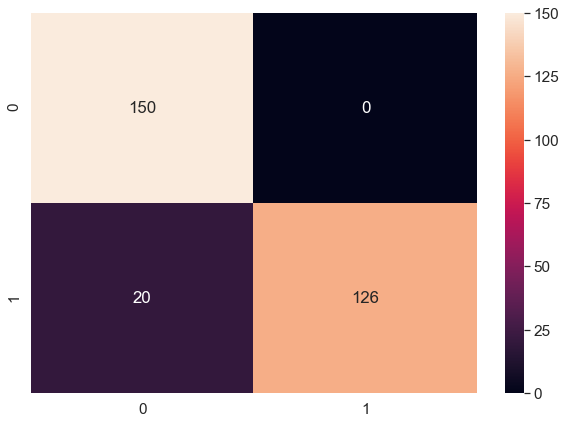

In [51]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred.round())

df_cm = pd.DataFrame(cm, index=(0,1), columns = (0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

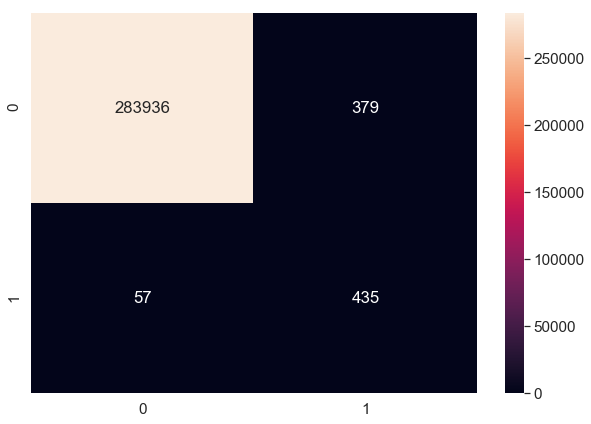

In [52]:
y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred.round())

df_cm = pd.DataFrame(cm, index=(0,1), columns = (0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

## SMOTE

In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
X_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel())

In [55]:
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size=0.3)

In [58]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [59]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
398041/398041 [==============================] - 218s 547us/step - loss: 0.0329 - acc: 0.9887
Epoch 2/5
398041/398041 [==============================] - 220s 552us/step - loss: 0.0130 - acc: 0.9963
Epoch 3/5
398041/398041 [==============================] - 215s 540us/step - loss: 0.0115 - acc: 0.9972
Epoch 4/5
398041/398041 [==============================] - 182s 458us/step - loss: 0.0091 - acc: 0.9978
Epoch 5/5
398041/398041 [==============================] - 175s 439us/step - loss: 0.0084 - acc: 0.9979


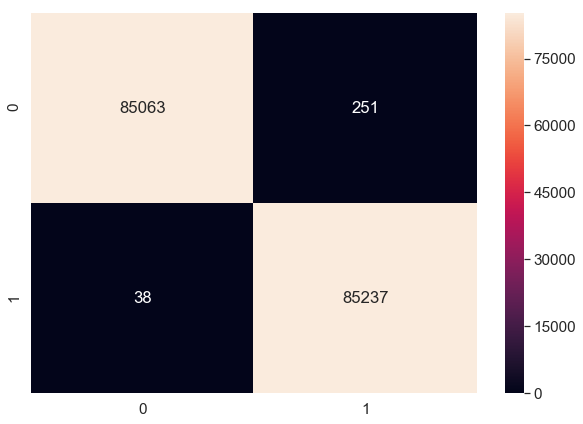

In [60]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred.round())

df_cm = pd.DataFrame(cm, index=(0,1), columns = (0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

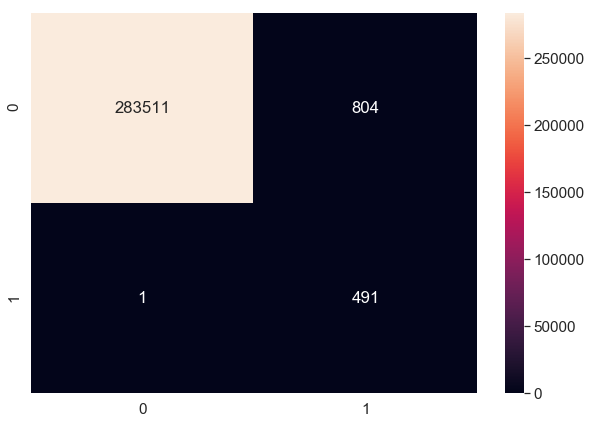

In [61]:
y_pred = model.predict(X)
cm = confusion_matrix(y, y_pred.round())

df_cm = pd.DataFrame(cm, index=(0,1), columns = (0,1))
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()